In [1]:
import pandas as pd

In [2]:
df = pd.read_feather("../data/annotated_data.feather")
print(df.shape)
df.head()

(84990, 39)


,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training",...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
0,W999667810,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,0.970215,0.000000,0.010002,...,0.020004,0.010002,0.029999,0.990234,0.000000,1.000000,0.449951,0.000000,0.080017,0.790039
1,W999644455,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,0.010002,0.059998,0.020004,...,0.010002,0.010002,0.939941,0.640137,0.239990,0.010002,0.779785,0.010002,0.959961,0.029999
2,W999485533,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,0.290039,0.439941,0.010002,...,0.010002,0.020004,0.049988,0.620117,0.239990,0.010002,1.000000,0.010002,0.970215,0.189941
3,W998914803,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,0.939941,0.010002,0.010002,...,0.010002,0.010002,0.979980,0.529785,0.320068,1.000000,0.010002,0.000000,0.260010,0.990234
4,W998247206,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,0.979980,0.010002,0.020004,...,0.000000,0.010002,0.589844,0.439941,0.439941,0.010002,0.010002,0.010002,0.010002,0.990234


In [4]:
df.sample(10000).to_csv('../data/sample.csv')

In [3]:
list(df.columns)

['id',
 'title',
 'abstract',
 'publication_year',
 'type',
 'doi',
 'INCLUDE',
 '4 - 1. Economic instruments',
 '4 - 2. Regulatory Instruments',
 '4 - 3. Information, education and training',
 '4 - 4. Governance, strategies and targets',
 '4 - 5. Agreements',
 '5 - 1.02. Carbon pricing',
 '5 - 1.02. Subsidies',
 '5 - 1.03. Non-carbon taxes',
 '5 - 1.04. Direct Investment / spending',
 '5 - 2.06. Quotas',
 '5 - 2.09. Spatial and land-use planning',
 '5 - 2.11. Standards',
 '5 - 3.15. Standardized labels, reporting and accounting standards and certification schemes',
 '5 - 4.17. Planning',
 '5 - 4.18. Government administration & management',
 '5 - 4.19. Institutions',
 '5 - 5.21. Inter/transnational agreements',
 '5 - 5.20. Inter/transnational agreements',
 '8 - 01. AFOLU',
 '8 - 02. Buildings',
 '8 - 03. Industry',
 '8 - 04. Energy',
 '8 - 05. Transport',
 '8 - 06. Waste',
 '8 - 15. Cross-sectoral',
 '10 - 3. Quantitative',
 '10 - 4. Qualitative',
 '17 - 0. Supranational and internatio

In [5]:
df[
    (df['8 - 03. Industry']>=0.5) & 
    (df['19 - 0. Ex-post']>=0.5)
].shape

(2900, 39)

In [10]:
df[
    (
        (df['8 - 03. Industry']>=0.5) | 
        (df['8 - 04. Energy']>=0.5)
    ) & 
    (df['19 - 0. Ex-post']>=0.5)
].to_csv('../data/industry_energy.csv', index=False)

In [3]:
df['ta'] = df['title'] + " " + df['abstract']

In [14]:
q = "public acceptance|public perception|public opinion"
rv_string = '''“systematic review” OR “scoping review” OR “narrative review” OR “meta-analysis” OR “evidence synthesis” OR “meta-review” OR “evidence map” OR “rapid review” OR “umbrella review” OR “qualitative synthesis” OR “configurative review” OR “aggregative review” OR “thematic synthesis” OR “framework synthesis” OR “mapping review” OR “meta-synthesis” OR “qualitative evidence synthesis” OR “critical review” OR “integrative review” OR “integrative synthesis” OR “narrative summary” OR “state of the art review” OR “rapid evidence assessment” OR “qualitative research synthesis” OR “qualitative meta-summary” OR “meta-ethnography” OR “meta-narrative review” OR “mixed methods synthesis” OR “scoping study” OR “systematic map"'''
rv_string = '''“systematic review” OR “systematic map” OR “meta-analysis”'''
q = rv_string.replace('“','(').replace('”',')').replace('"',')').replace(' OR ','|')
sub_df = df[df["ta"].str.lower().str.contains(q)]
sub_df.to_csv('../data/reviews.csv', index=False)
#sub_df.to_csv("../data/attitudes.csv")
print(sub_df.shape)
sub_df.head()


/tmp/ipykernel_1006034/3690226042.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sub_df = df[df["ta"].str.lower().str.contains(q)]


(281, 40)


,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training",...,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,ta
444,W852460849,Drivers of deforestation and REDD+ benefit-sha...,REDD+ (reducing emissions from deforestation a...,2015,journal-article,https://doi.org/10.1016/j.envsci.2015.06.017,0.990234,0.919922,0.010002,0.020004,...,0.020004,0.049988,0.020004,0.979980,1.000000,0.020004,0.029999,0.979980,0.819824,Drivers of deforestation and REDD+ benefit-sha...
491,W842328916,What do adaptation aid actions look like? The ...,Evidence that adaptation is necessary to manag...,2013,None,None,0.799805,0.959961,0.000000,0.029999,...,0.010002,0.979980,0.160034,0.799805,1.000000,0.040009,0.000000,0.990234,0.020004,What do adaptation aid actions look like? The ...
737,W784444221,Questioning the sustainability of Biodiesel: F...,Biofuels contribute to the mitigation of clima...,2005,posted-content,None,0.990234,0.059998,0.629883,0.000000,...,0.029999,0.010002,0.859863,0.059998,0.990234,0.000000,0.010002,0.990234,0.099976,Questioning the sustainability of Biodiesel: F...
754,W781228872,Explaining the variation in the value of build...,The built environment has been identified as o...,2014,posted-content,None,1.000000,0.130005,1.000000,0.090027,...,0.029999,0.020004,0.979980,0.010002,1.000000,0.449951,0.000000,0.899902,0.099976,Explaining the variation in the value of build...
2431,W567044335,Empirical Modeling of the Economy and the Envi...,"C. B?hringer, A. L?schel: Introduction.- D.L. ...",2003,book,https://doi.org/10.1007/978-3-642-57415-3,0.990234,0.990234,0.080017,0.020004,...,0.010002,0.970215,0.990234,0.000000,0.990234,0.010002,0.010002,0.729980,0.379883,Empirical Modeling of the Economy and the Envi...


0
0.0033062713260383573


Text(0.5, 1.0, 'Systematic review, mapping, \nand meta-analytic studies: 281')

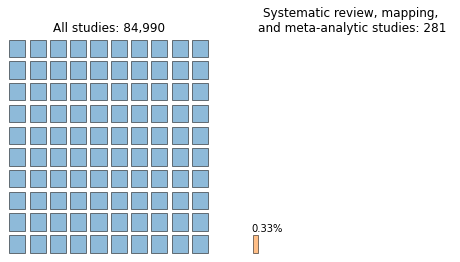

In [15]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(1,2, figsize=(8,4))

n1 = df.shape[0]
n2 = sub_df.shape[0]
n2_share = n2/n1

ax = axs[0]

ax.axis('off')

rects = [
    Rectangle((x%10*0.1+0.01,x//10*0.1+0.01),0.08,0.08) for x in range(100)
]

pc = PatchCollection(rects, facecolor='C0', alpha=0.5,
                         edgecolor='black')

ax.add_collection(pc)

ax.set_title(f'All studies: {n1:,}')

ax = axs[1]

rects = []
for x in range(100):
    if n2_share > x*0.01:
        print(x)
        
        diff = n2_share - x*0.01
        print(diff)
        if diff < 0.01:
            width = 0.08*diff*100
        else:
            width = 0.08
        rects.append(Rectangle(
            (x%10*0.1+0.01,x//10*0.01+0.01), width, 0.08
        ))
        
    else:
        ax.text(
            x%10*0.1+0.01 - 0.08-width,
            x//10*0.01+0.11,
            f'{n2_share:.2%}'
        )
        break
        
        
pc = PatchCollection(rects, facecolor='C1', alpha=0.5,
                         edgecolor='black')

ax.add_collection(pc)

ax = axs[1]
ax.axis('off')
ax.set_title(f'Systematic review, mapping, \nand meta-analytic studies: {n2:,}')



#fig.tight_layout()

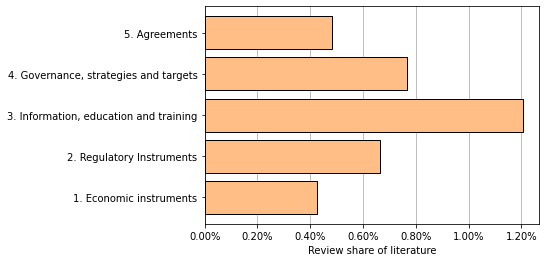

In [7]:
from matplotlib import ticker


cats = [x for x in df.columns if '4 -' in x]
fig, ax = plt.subplots()

for i, c in enumerate(cats):
    c_n = df[df[c]>=0.5].shape[0]
    c_s = sub_df[sub_df[c]>=0.5].shape[0] / c_n
    
    ax.barh(i, c_s, color='#FFBE86', alpha=1, edgecolor='black', zorder=5)
    
    ax.set_yticks(range(len(cats)))
    ax.set_yticklabels([x.split(' - ')[1] for x in cats])
    
ax.set_xlabel('Review share of literature')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.grid(axis='x', zorder=-5)

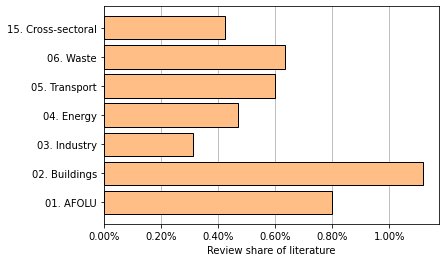

In [9]:
from matplotlib import ticker


cats = [x for x in df.columns if '8 -' in x]
fig, ax = plt.subplots()

for i, c in enumerate(cats):
    c_n = df[df[c]>=0.5].shape[0]
    c_s = sub_df[sub_df[c]>=0.5].shape[0] / c_n
    
    ax.barh(i, c_s, color='#FFBE86', alpha=1, edgecolor='black', zorder=5)
    
    ax.set_yticks(range(len(cats)))
    ax.set_yticklabels([x.split(' - ')[1] for x in cats])
    
ax.set_xlabel('Review share of literature')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.grid(axis='x', zorder=-5)

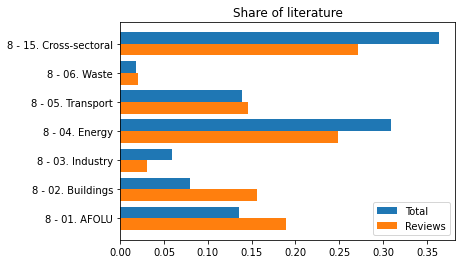

In [5]:
import re
import matplotlib.pyplot as plt
sectors = [x for x in df.columns if re.match("^8",x)]
sdf = []
for s in sectors:
    sdf.append({
        "sector": s,
        "total": df[df[s]>0.5].shape[0],
        "query": sub_df[sub_df[s]>0.5].shape[0]
    })
sdf = pd.DataFrame.from_dict(sdf)
sdf["total_share"] = sdf["total"] / df.shape[0]
sdf["query_share"] = sdf["query"] / sub_df.shape[0]
fig, ax = plt.subplots()

ax.barh(sdf.index+0.2, sdf["total_share"], height=0.4, label="Total")
ax.barh(sdf.index-0.2, sdf["query_share"], height=0.4, label="Reviews")
ax.set_yticks(range(len(sdf["sector"])))
ax.set_yticklabels(sdf["sector"])
ax.set_title("Share of literature")
ax.legend()

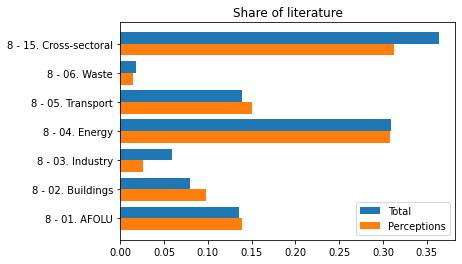

In [24]:
import re
import matplotlib.pyplot as plt
sectors = [x for x in df.columns if re.match("^8",x)]
sdf = []
for s in sectors:
    sdf.append({
        "sector": s,
        "total": df[df[s]>0.5].shape[0],
        "query": sub_df[sub_df[s]>0.5].shape[0]
    })
sdf = pd.DataFrame.from_dict(sdf)
sdf["total_share"] = sdf["total"] / df.shape[0]
sdf["query_share"] = sdf["query"] / sub_df.shape[0]
fig, ax = plt.subplots()

ax.barh(sdf.index+0.2, sdf["total_share"], height=0.4, label="Total")
ax.barh(sdf.index-0.2, sdf["query_share"], height=0.4, label="Perceptions")
ax.set_yticks(range(len(sdf["sector"])))
ax.set_yticklabels(sdf["sector"])
ax.set_title("Share of literature")
ax.legend()

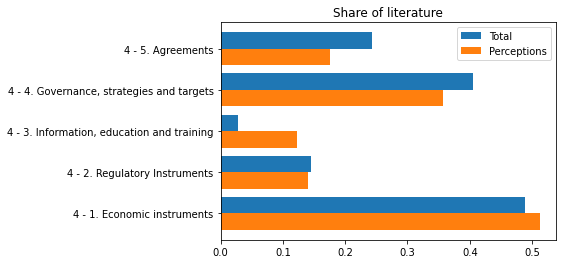

In [25]:
import re
import matplotlib.pyplot as plt
sectors = [x for x in df.columns if re.match("^4",x)]
sdf = []
for s in sectors:
    sdf.append({
        "sector": s,
        "total": df[df[s]>0.5].shape[0],
        "query": sub_df[sub_df[s]>0.5].shape[0]
    })
sdf = pd.DataFrame.from_dict(sdf)
sdf["total_share"] = sdf["total"] / df.shape[0]
sdf["query_share"] = sdf["query"] / sub_df.shape[0]
fig, ax = plt.subplots()

ax.barh(sdf.index+0.2, sdf["total_share"], height=0.4, label="Total")
ax.barh(sdf.index-0.2, sdf["query_share"], height=0.4, label="Perceptions")
ax.set_yticks(range(len(sdf["sector"])))
ax.set_yticklabels(sdf["sector"])
ax.set_title("Share of literature")
ax.legend()